<a href="https://colab.research.google.com/github/shreshthsk/MLProjects/blob/main/TextExtractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

Download Tesseract

In [24]:
#Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata",stream = True)

with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [31]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

#Importing IPython
from IPython.display import HTML, clear_output
clear_output()

In [32]:
#OpenCV and Pytesseract installation
!pip install pytesseract wand opencv-python
clear_output()

Import Libraries

In [33]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

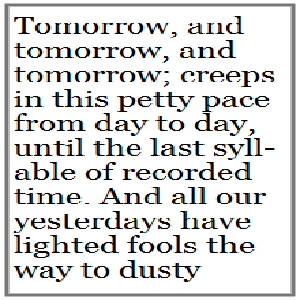

In [34]:
#Reading image from url
image1 = Image.open(requests.get("https://i.stack.imgur.com/5W40s.png",stream = True).raw)
image1 = image1.resize((300,300))
image1.save('sample.png')
image1

In [35]:
# Simply extracting text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image1,config=custom_config)
print(text)

Tomorrow, and
tomorrow, and
tomorrow; creeps
in this petty pace
from day to day,
until the last syll-
able of recorded
time. And all our
yesLerdays have
lighted fools the
way to dusty



In [36]:
#For Complex images
image = cv2.imread("sample.png")

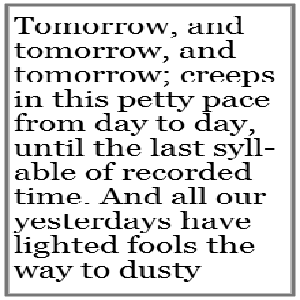

In [38]:
def getgrayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = getgrayscale(image)
Image.fromarray(gray)

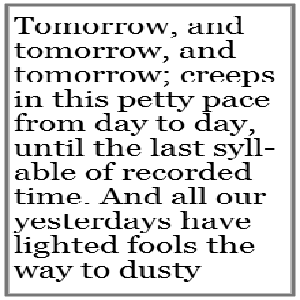

In [39]:
#Remove Noise
def remove_noise(image):
  return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

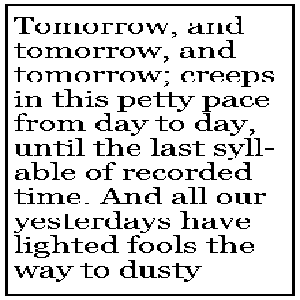

In [40]:
#thresholding
def thresholding(image):
  return cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

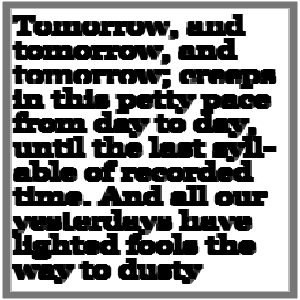

In [43]:
#erosion
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image,kernel,iterations = 1)
erode = erosion(gray)
Image.fromarray(erode)

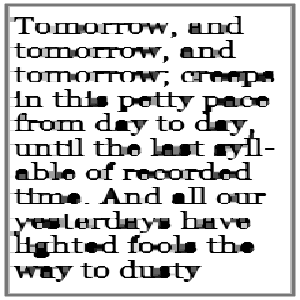

In [45]:
#Morphology
def opening(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
morphed = opening(gray)
Image.fromarray(morphed)

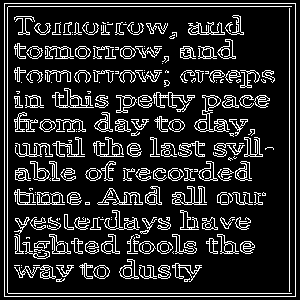

In [47]:
#Canny Edge Detection
def Canny(image):
  return cv2.Canny(image,100,200)
canny = Canny(gray)
Image.fromarray(canny)

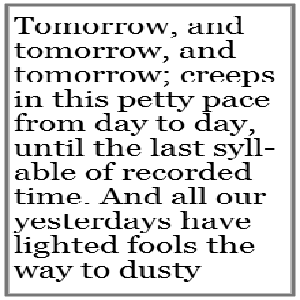

In [59]:
#Deskew
def deskew(image):
  cords = np.column_stack(np.where( image<0 ))
  angle = cv2.minAreaRect(cords)[-1]
  if angle < (-45):
    angle = -(90+angle)
  else:
    angle = -angle
  (h,w) = image.shape[:2]
  center = (w//2,h//2)
  M = cv2.getRotationMatrix2D(center,angle,1.0)
  rotated = cv2.warpAffine(image,M,(w,h),flags = cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
  return rotated
rotated = deskew(gray)
Image.fromarray(rotated)

In [60]:
#Template_Matching
def template_matching(image,template):
  return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
match = template_matching(gray,gray)
match

array([[1.]], dtype=float32)